# Linear Regression to estimate high-order epistasis

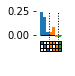

In [1]:
# Import a model and the plotting module
from epistasis.models import EpistasisLinearRegression
from epistasis.pyplot import plot_coefs

# Genotype-phenotype map data.
wildtype = "AAA"

genotypes = ["AAA", "ATA", "TAA", "ATT", "TAT", "TTA", "TTT"]
phenotypes = [0.1, 0.4, 0.3, 0.3, 0.6, 0.8, 1.0]

# genotypes = ["AAA", "AAT", "ATA", "TAA", "ATT", "TAT", "TTA", "TTT"]
# phenotypes = [0.1, 0.2, 0.4, 0.3, 0.3, 0.6, 0.8, 1.0]

# Construct an epistasis model.
model = EpistasisLinearRegression(order=3)
model.add_data(wildtype=wildtype,
                genotypes=genotypes,
                phenotypes=phenotypes)

# Fit the model.
model.fit()

# loo
coef_sites = model.epistasis.sites # List of site indexes
coef_values = model.epistasis.values # List of coefficient values

# Plot figure.
fig, axes = plot_coefs(coef_sites, coef_values, figsize=(.5,.75), ybounds=(-.05, .25))
fig